In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier
from LDA import LDA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score


In [2]:
data_train = np.load('data/fashion_train.npy', mmap_mode='r')
data_test = np.load('data/fashion_test.npy', mmap_mode='r')

In [3]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

In [4]:
#our LDA
clf = LDA(n_components=4)
clf.fit(X_train, y_train)
lda_transformed_X_train= clf.transform(X_train)
lda_X_test = clf.transform(X_test)

print(lda_X_test.shape, lda_transformed_X_train.shape)

(5000, 4) (10000, 4)


In [11]:
#lda using sklearn
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
lda_transformed_X_train_2= lda.fit_transform(X_train, y_train)
lda_X_test_2 = lda.transform(X_test)

In [6]:
#PCA using sklearn
pca = PCA(n_components=784)
pca_transformed_X_train= pca.fit_transform(X_train, y_train)
pca_X_test_transformed = pca.transform(X_test)

In [7]:
#returns accuracy of KNN classifier
def KNN_accuracy(X_train,y_train,X_test):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    predictions = (neigh.predict(X_test))

    acc = np.sum(predictions== y_test)/len(y_test)
    return acc



In [12]:
#KNN_accuracy(pca_transformed_X_train,y_train,pca_X_test_transformed )
KNN_accuracy(lda_transformed_X_train,y_train,lda_X_test )

0.7956

In [9]:
def cross_val(X,y,n,cv):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X, y)
    scores = cross_val_score(neigh, X, y, cv=cv)
    return scores

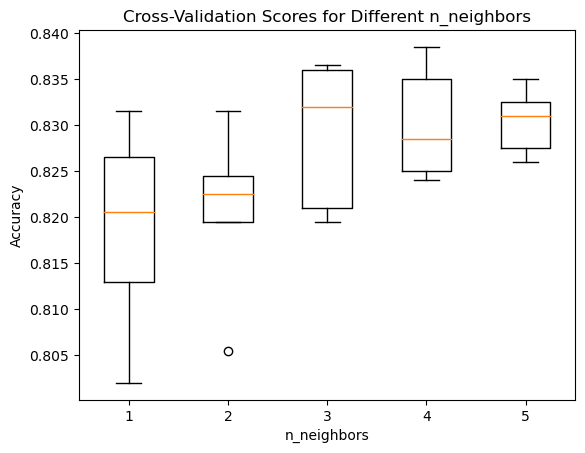

In [26]:
n_values = [1, 2, 3,4, 5]
all_scores = []
cv=5

for n in n_values:
    scores = cross_val(X_train, y_train, n, cv)
    all_scores.append(scores)

# Plotting
plt.boxplot(all_scores, labels=n_values)
plt.title('Cross-Validation Scores for Different n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
all_scores

[array([0.8315, 0.8265, 0.813 , 0.802 , 0.8205]),
 array([0.8315, 0.8225, 0.8245, 0.8055, 0.8195]),
 array([0.832 , 0.8365, 0.836 , 0.8195, 0.821 ]),
 array([0.8285, 0.835 , 0.8385, 0.824 , 0.825 ]),
 array([0.826 , 0.8275, 0.831 , 0.8325, 0.835 ])]